In [100]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt





In [101]:
entire_education = pd.read_csv("tesem240_linear.csv")
LFS = pd.read_csv("cleaned_LFS.txt")
productivity = pd.read_csv("cleaned_Productivity.txt")

entire_education.head()

,DATAFLOW,LAST UPDATE,freq,sex,age,unit,isced11,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TESEM240(1.0),15/02/23 23:00:00,A,T,Y25-64,PC,ED3-8,AT,2005,80.4,NaN
1,ESTAT:TESEM240(1.0),15/02/23 23:00:00,A,T,Y25-64,PC,ED3-8,AT,2006,80.1,b
2,ESTAT:TESEM240(1.0),15/02/23 23:00:00,A,T,Y25-64,PC,ED3-8,AT,2007,79.9,NaN
3,ESTAT:TESEM240(1.0),15/02/23 23:00:00,A,T,Y25-64,PC,ED3-8,AT,2008,80.9,NaN
4,ESTAT:TESEM240(1.0),15/02/23 23:00:00,A,T,Y25-64,PC,ED3-8,AT,2009,81.6,NaN


In [102]:
productivity.head()

,LOCATION,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,mean
0,AUS,43.813437,45.338482,46.025462,47.089456,46.931496,47.099677,47.342066,47.873036,49.523676,...,52.558753,52.780926,54.099648,53.945416,54.561035,54.559641,55.212012,56.214321,56.820351,50.587459
1,AUT,55.825179,56.533555,57.591558,58.071618,59.181589,60.632340,62.218785,63.814049,63.814456,...,66.080679,66.327394,67.267651,67.184974,67.999464,68.309455,68.309868,69.970148,69.634603,63.955261
2,BEL,63.089170,63.233672,63.667303,64.204011,66.278551,67.287921,67.637137,68.887444,68.464336,...,69.517696,70.513657,71.604653,71.674769,71.534022,71.681631,72.259271,74.541737,73.607184,68.830169
3,BGR,14.861829,15.438275,16.313284,16.783858,17.182034,17.965425,18.618248,19.229785,19.475667,...,22.460713,22.607390,23.296069,23.897609,24.130056,24.784139,25.687153,25.775778,26.559335,20.905039
4,CAN,44.249048,44.960465,45.686833,45.787448,46.167149,47.187987,47.742663,47.802103,47.658733,...,50.068609,51.425818,51.340885,51.524774,52.346352,52.543577,52.996192,56.971404,53.969872,49.328641


In [103]:
LFS.head()

,COUNTRY,AGE,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AUT,1519,4.800497,4.712383,4.542107,4.386722,4.329051,4.465518,4.571428,4.778608,...,4.366794,4.033757,3.857898,3.606510,3.437172,3.217142,3.218943,3.030451,3.115255,3.019705
1,AUT,2024,8.491435,8.234578,8.251706,8.309549,9.000199,9.038387,8.847595,8.733222,...,8.534328,8.657429,8.498647,8.446632,8.438677,8.135179,7.911102,7.821786,7.457202,7.413291
2,AUT,2529,12.075501,11.667637,11.270501,10.860466,10.894050,10.679331,10.584267,10.631102,...,10.842927,10.734493,10.719576,10.948351,11.196044,11.128170,11.044611,11.087095,10.846141,10.967592
3,AUT,3034,15.673568,15.066610,14.587211,14.123935,13.470190,12.605022,12.109235,11.536727,...,11.240910,11.246036,11.590859,11.713372,11.806186,11.651908,11.481042,11.558618,11.682787,11.611802
4,AUT,3539,16.267566,16.215274,16.272878,16.084585,16.011517,15.617561,15.085075,14.541243,...,11.599208,11.295588,11.184419,11.094047,11.078044,11.442098,11.640566,11.847494,11.835222,11.908361


In [104]:
# drop columns that are constant in this data

data = entire_education.copy()

education = entire_education.drop(columns=["DATAFLOW", "LAST UPDATE", "freq", "sex", "age", "unit", "isced11"])
education.head()

,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,AT,2005,80.4,NaN
1,AT,2006,80.1,b
2,AT,2007,79.9,NaN
3,AT,2008,80.9,NaN
4,AT,2009,81.6,NaN


In [105]:
# the geographical labels are not the same
print(education["geo"].unique())
print(LFS["COUNTRY"].unique())

['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA20' 'EE' 'EL' 'ES' 'EU27_2020'
 'FI' 'FR' 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL'
 'NO' 'PL' 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK']
['AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'CHL' 'COL' 'CRI' 'CYP' 'CZE' 'DEU' 'DNK'
 'ESP' 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IDN' 'IRL' 'ISL' 'ISR'
 'ITA' 'JPN' 'KOR' 'LTU' 'LUX' 'LVA' 'MEX' 'MKD' 'MLT' 'NLD' 'NOR' 'NZL'
 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'TUR' 'USA']


In [106]:
# drop aggregates and countries not in productivity
indicesToDrop = education[((education.geo == 'EU27_2020') | 
                       (education.geo == "ME") |
                       (education.geo == "RS") |
                       (education.geo == 'EU20'))].index
education.drop(indicesToDrop, inplace=True)
education.reset_index(inplace=True, drop=True)
print(education["geo"].unique())

['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EA20' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'MK' 'MT' 'NL' 'NO' 'PL' 'PT'
 'RO' 'SE' 'SI' 'SK' 'TR' 'UK']


In [107]:
# agonisingly and painstakingly look through the dataset and relabel

renaming = {"AT" : "AUT", "BE" : "BEL", "BG" : "BGR", "CH" : "CHE", "CY" : "CYP", "CZ" : "CZE",
            "DE" : "DEU", "DK" : "DNK", "EE" : "EST", "EL" : "GRC", "ES" : "ESP", "FI" : "FIN", 
            "FR" : "FRA", "HR" : "HRV", "HU" : "HUN", "IE" : "IRL", "IS" : "ISL", "IT" : "ITA",
            "LT" : "LTU", "LU" : "LUX", "LV" : "LVA", "MK" : "MKD", "MT" : "MLT", "NL" : "NLD",
            "NO" : "NOR", "PL" : "POL", "PT" : "PRT", "RO" : "ROU", "SE" : "SWE", "SI" : "SVN", 
            "SK" : "SVK", "TR" : "TUR", "UK" : "GBR"}

education.replace(renaming, inplace=True)

education

,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,AUT,2005,80.4,NaN
1,AUT,2006,80.1,b
2,AUT,2007,79.9,NaN
3,AUT,2008,80.9,NaN
4,AUT,2009,81.6,NaN
...,...,...,...,...
567,GBR,2015,79.7,NaN
568,GBR,2016,79.5,NaN
569,GBR,2017,80.1,NaN
570,GBR,2018,80.4,NaN


In [108]:
# configure to same format as productivity
education = pd.pivot_table(education, index="geo", columns="TIME_PERIOD", values="OBS_VALUE")
education.head()

TIME_PERIOD,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
geo,,,,,,,,,,,,,,,,,
AUT,80.4,80.1,79.9,80.9,81.6,82.4,82.4,82.9,83.0,83.9,84.6,84.5,85.0,85.3,85.6,85.7,85.9
BEL,66.1,66.9,68.0,69.6,70.6,70.5,71.3,71.6,72.8,73.6,74.7,75.1,76.8,78.2,78.7,79.8,81.5
BGR,72.5,75.5,77.4,77.5,77.9,79.1,80.0,81.0,81.8,81.1,81.9,82.3,82.8,82.6,82.5,83.1,83.4
CHE,83.0,85.2,86.0,86.8,86.9,85.0,84.8,85.7,86.4,87.2,87.3,87.4,87.8,88.4,89.0,89.3,87.4
CYP,66.6,69.5,72.1,73.1,72.3,74.0,75.2,77.4,78.5,77.6,77.9,79.5,81.1,82.2,82.5,83.2,84.6


Text(0.5, 1.0, 'Percentage of the population with at least upper secondary educational attainment, age group 25-64')

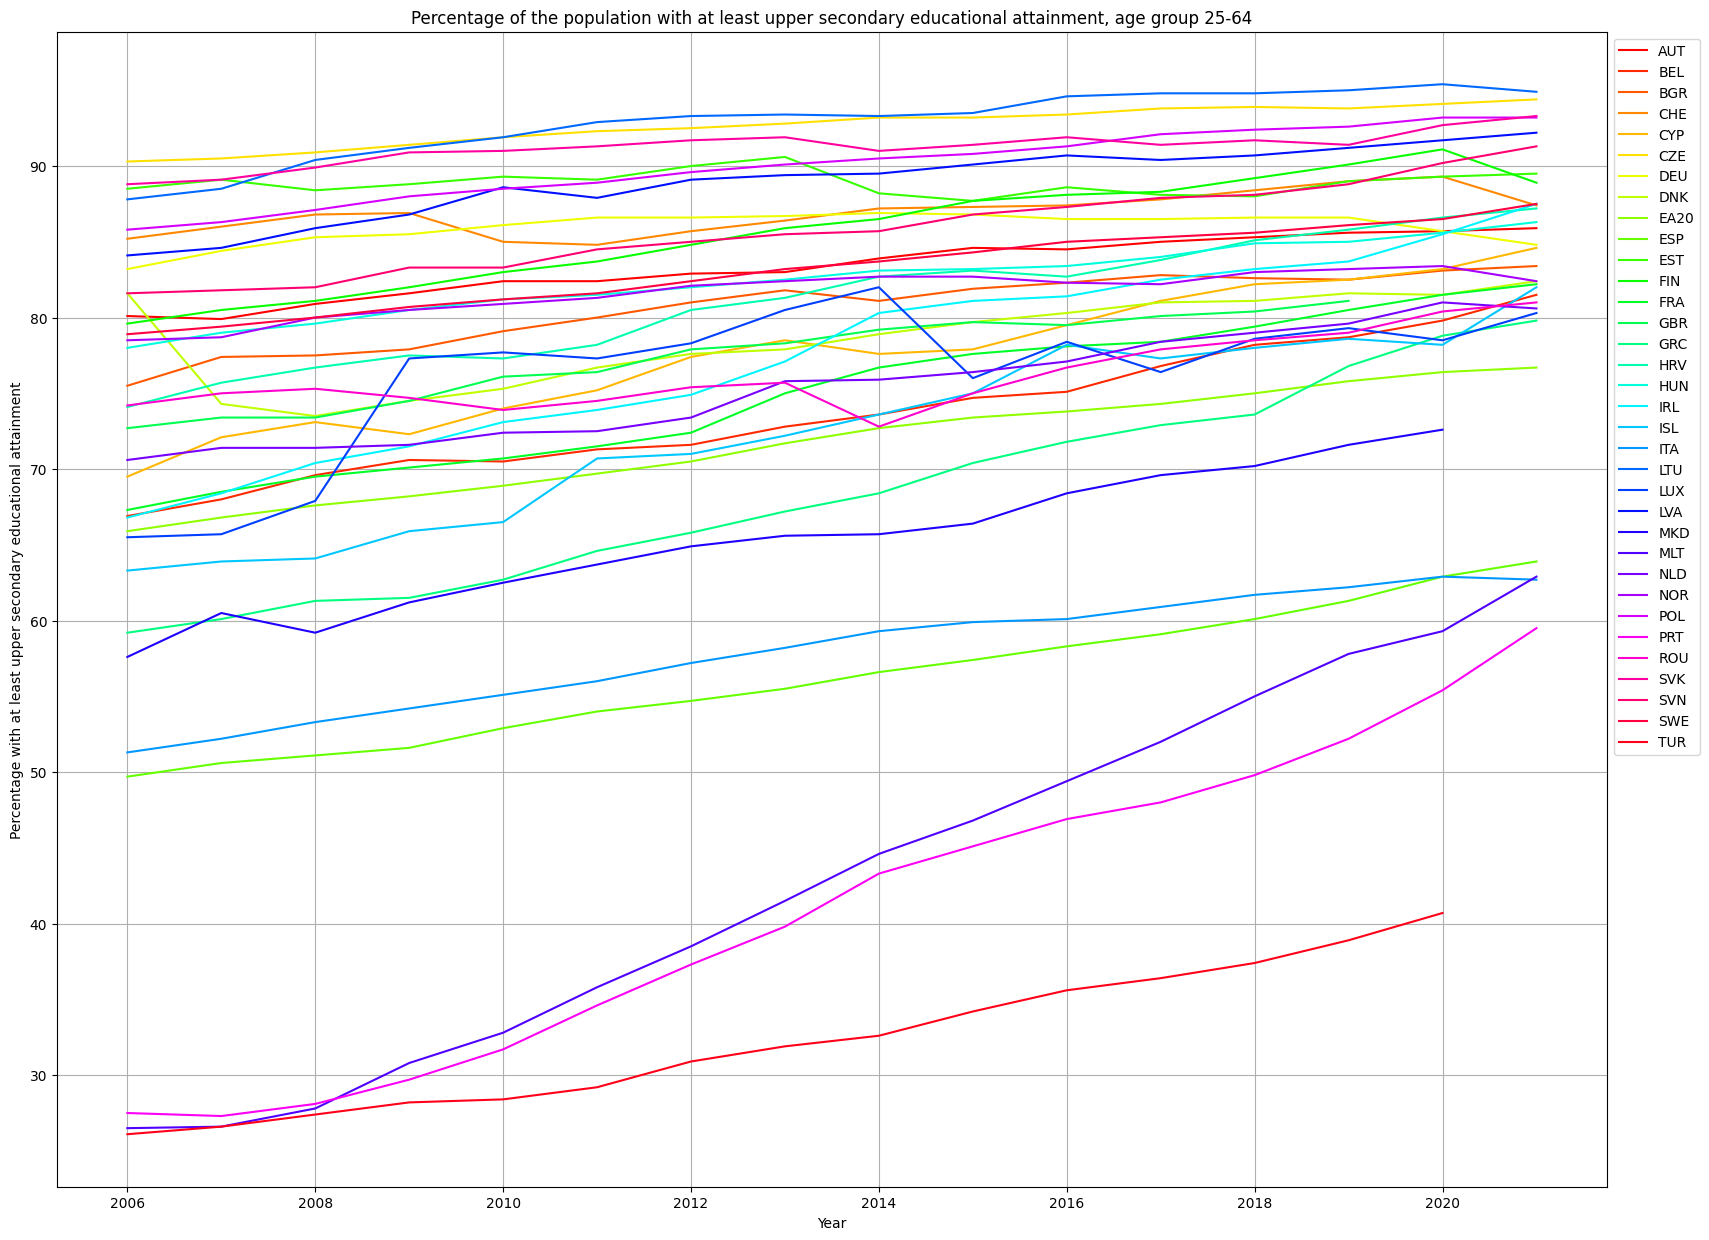

In [120]:
# using nuno's code to see what it looks like (thanks nuno)

numberOfRows = education.shape[0]
numberOfColumns = education.shape[1]
plt.figure(figsize=(20, 15))

colors = plt.cm.hsv(np.linspace(0, 1, numberOfRows))

for row in range(numberOfRows):
    countryCode = education.iloc[row].name
    plt.plot(np.array(education.columns[1:]), education.iloc[row][1:], color=colors[row], label=countryCode)

plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='best')
plt.xlabel('Year') 
plt.ylabel('Percentage with at least upper secondary educational attainment')
plt.title("Percentage of the population with at least upper secondary educational attainment, age group 25-64")